In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go

In [45]:
# Carregar os dados
df = pd.read_csv("../data/commerce_dataset.csv", sep=";")

## ARIMA


In [46]:
# Converter a coluna 'dtme' para o formato de data
df["dtme"] = pd.to_datetime(df["dtme"])

# Agregar as vendas totais por data
sales_daily = df.groupby("dtme")["total"].sum()

# Verificar as primeiras linhas da série temporal agregada
sales_daily.head(5)

dtme
2019-01-01    4745.1810
2019-01-02    1945.5030
2019-01-03    2078.1285
2019-01-04    1623.6885
2019-01-05    3536.6835
Name: total, dtype: float64

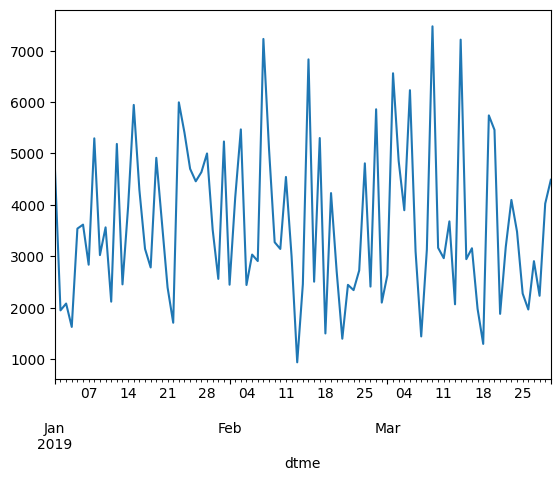

In [47]:
# plotar um grafico das vendas totais diárias
sales_daily.plot()
plt.show()

In [48]:
# Realizar teste ADF para verificar estacionariedade
adf_result = adfuller(sales_daily)

# Exibir os resultados do teste ADF
adf_output = pd.Series(
    adf_result[0:4],
    index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"],
)
for key, value in adf_result[4].items():
    adf_output[f"Critical Value ({key})"] = value

adf_output

Test Statistic                -7.654896e+00
p-value                        1.749564e-11
#Lags Used                     1.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64

In [49]:
# Definindo o modelo ARIMA com os parâmetros iniciais (1,0,1)
model = ARIMA(sales_daily, order=(1, 0, 1))

# Ajustando o modelo à série temporal
model_fit = model.fit()

# Resumo do modelo ajustado
model_fit.summary()

/home/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  total   No. Observations:                   89
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -777.699
Date:                Mon, 26 Feb 2024   AIC                           1563.398
Time:                        10:30:28   BIC                           1573.352
Sample:                    01-01-2019   HQIC                          1567.410
                         - 03-30-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3628.8404    145.478     24.944      0.000    3343.709    3913.971
ar.L1          0.5372      0.676      0.794      0.427      -0.789       1.863
ma.L1         -0.6339      0.634     -1.000      0.317      -1.876       0.608
sigma2      2.267e+06   4.43e+05      5.118      0.000     1.4e+06    3.14e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 4.67
Prob(Q):                              0.75   Prob(JB):                         0.10
Heteroskedasticity (H):               1.59   Skew:                             0.49
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# Fazer previsões para os próximos 7 dias após a última data no conjunto de dados
forecast_days = 7
forecast = model_fit.forecast(steps=forecast_days)

# Exibir as previsões
forecast

2019-03-31    3634.568024
2019-04-01    3631.917058
2019-04-02    3630.493055
2019-04-03    3629.728132
2019-04-04    3629.317243
2019-04-05    3629.096528
2019-04-06    3628.977968
Freq: D, Name: predicted_mean, dtype: float64

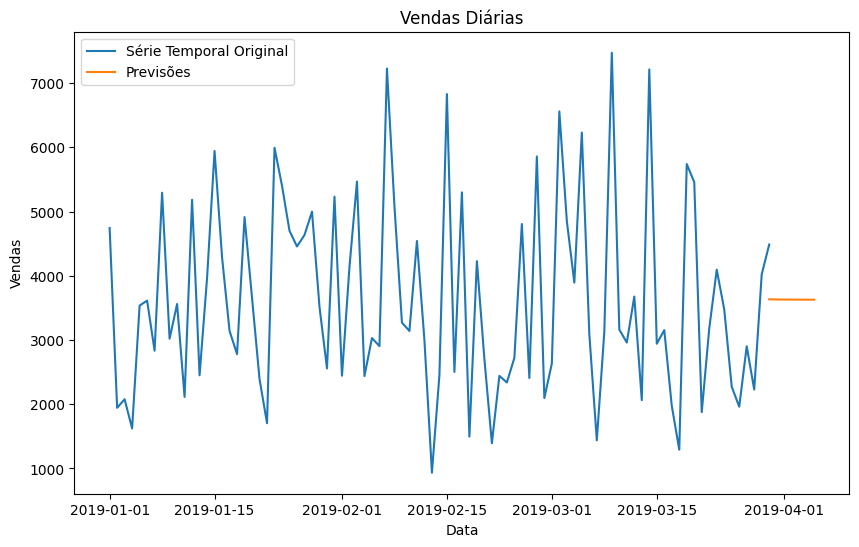

In [51]:
# Plotar a série temporal original e as previsões - usando matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sales_daily, label="Série Temporal Original")
plt.plot(
    np.arange(
        sales_daily.index[-1],
        sales_daily.index[-1] + pd.Timedelta(days=forecast_days),
        pd.Timedelta(days=1),
    ),
    forecast,
    label="Previsões",
)
plt.title("Vendas Diárias")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.show()

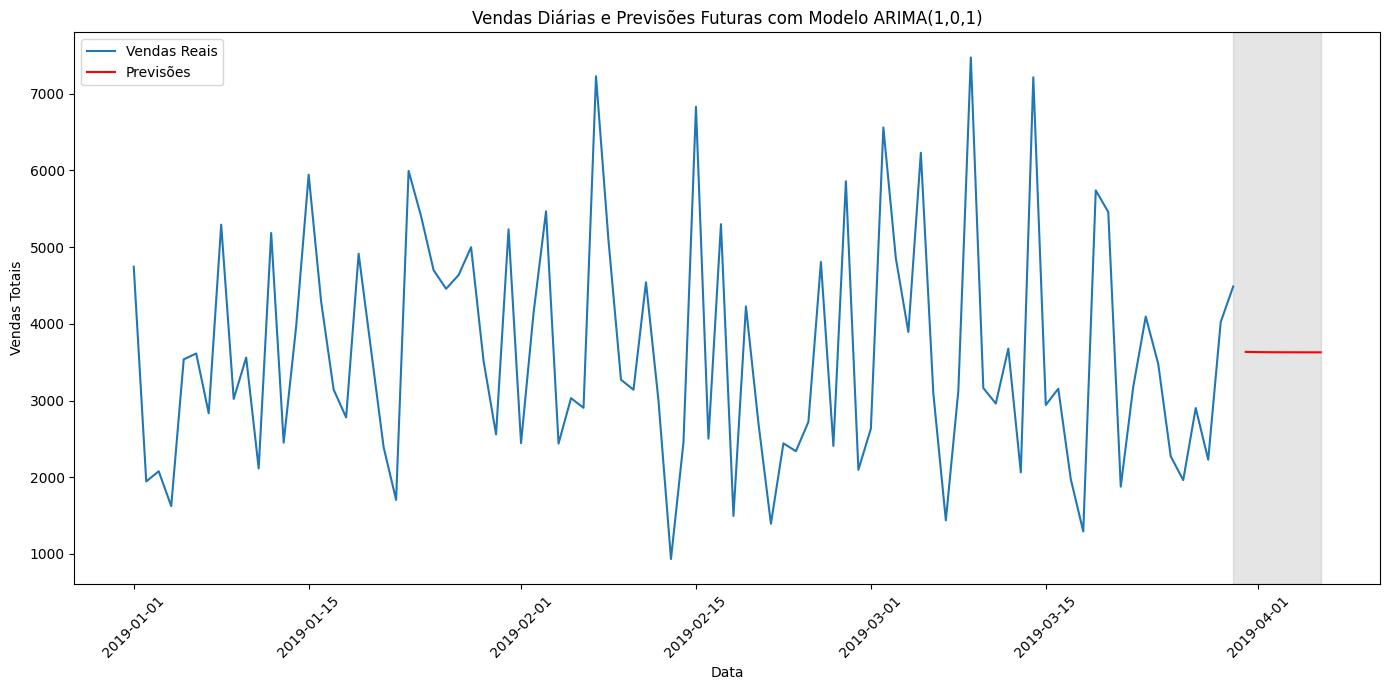

In [52]:
# Plotar a série temporal de vendas diárias e as previsões - com um destaque para o período de previsão
plt.figure(figsize=(14, 7))
plt.plot(sales_daily, label="Vendas Reais")
plt.plot(forecast, label="Previsões", color="red")

# Destacar o período de previsão
plt.axvspan(sales_daily.index[-1], forecast.index[-1], color="grey", alpha=0.2)

plt.title("Vendas Diárias e Previsões Futuras com Modelo ARIMA(1,0,1)")
plt.xlabel("Data")
plt.ylabel("Vendas Totais")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Plotar a série temporal original e as previsões - usando Plotly
# Criar um objeto de figura
fig = go.Figure()

# Adicionar a série temporal original ao gráfico
fig.add_trace(
    go.Scatter(
        x=sales_daily.index, y=sales_daily, mode="lines", name="Série Temporal Original"
    )
)

# Adicionar as previsões ao gráfico
fig.add_trace(
    go.Scatter(
        x=np.arange(
            sales_daily.index[-1],
            sales_daily.index[-1] + pd.Timedelta(days=forecast_days),
            pd.Timedelta(days=1),
        ),
        y=forecast,
        mode="lines",
        name="Previsões",
    )
)

# Configurar o título e os rótulos dos eixos
fig.update_layout(title="Vendas Diárias", xaxis_title="Data", yaxis_title="Vendas")

# Mostrar o gráfico
fig.show()

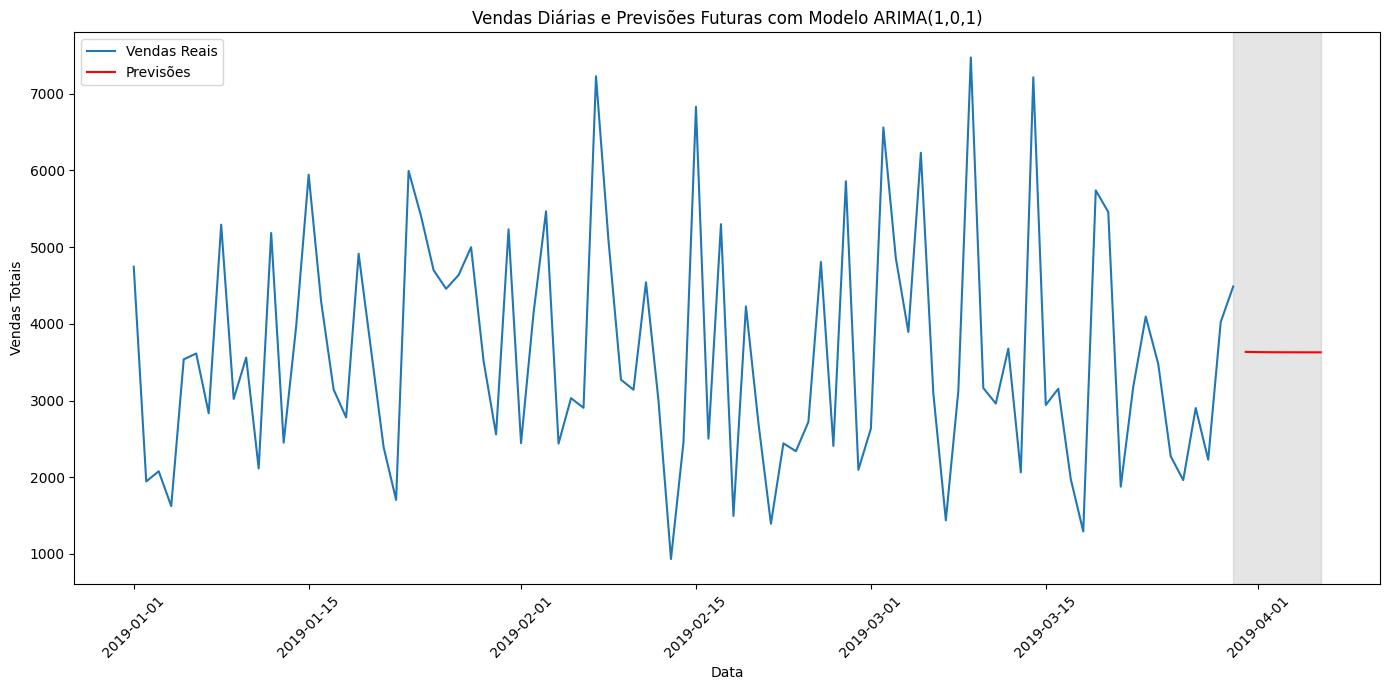

In [54]:
# Plotar com o seaborn
# Criar um DataFrame para facilitar o plot
df = pd.concat([sales_daily, forecast], axis=1)
df.columns = ["Vendas Reais", "Previsões"]

# Definir o tamanho da figura
plt.figure(figsize=(14, 7))

# Plotar a série temporal de vendas diárias
sns.lineplot(data=df, x=df.index, y="Vendas Reais", label="Vendas Reais")

# Plotar as previsões
sns.lineplot(data=df, x=df.index, y="Previsões", label="Previsões", color="red")

# Destacar o período de previsão
plt.axvspan(sales_daily.index[-1], forecast.index[-1], color="grey", alpha=0.2)

# Configurar o título e os rótulos dos eixos
plt.title("Vendas Diárias e Previsões Futuras com Modelo ARIMA(1,0,1)")
plt.xlabel("Data")
plt.ylabel("Vendas Totais")

# Configurar a legenda e a rotação dos rótulos do eixo x
plt.legend()
plt.xticks(rotation=45)

# Ajustar o layout e mostrar o gráfico
plt.tight_layout()
plt.show()